##Actividad 4 (Regresión Lineal Simple)
##Leonardo Espinosa - A01351259

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
data = pd.read_csv('DF_Mexico.csv')
print(data.sample(15).to_string())

                       id                                      listing_url       scrape_id last_scraped       source                                                name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [149]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [150]:
#Usamos un data.head para ver como se muestran los datos
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46


In [151]:
#Corroboramos valores nulos en las columnas de nuestro dataframe
valores_nulos=data.isnull().sum()
valores_nulos

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3596
Length: 75, dtype: int64

In [152]:
#Cambiamos columnas de texto a númericas
columnas_a_transformar = ['host_acceptance_rate', 'host_response_rate']

# Se cambian las columnas con el uso de un ciclo for
for columna in columnas_a_transformar:
    data[columna] = data[columna].str.rstrip('%').astype(float) / 100.0

#Cambios el formato de la columna price
data['price'] = data['price'].str.replace('[\$,]', '', regex=True).astype(float)

In [153]:
data.to_csv("Paso1.csv")

In [154]:
from google.colab import files

files.download("Paso1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Limpieza de datos

In [155]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1 = data.fillna(method="bfill")
data1

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,4.78,4.98,4.48,NaN,f,1,1,0,0,0.46
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
24220,853966732274073000,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
24221,854225071295768399,https://www.airbnb.com/rooms/854225071295768399,20230329041210,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/db71951a-8696...,154670560,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
24222,854247693069190865,https://www.airbnb.com/rooms/854247693069190865,20230329041210,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,...,NaN,NaN,NaN,NaN,t,13,13,0,0,NaN


In [156]:
#Verificamos información del DataFrame
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24224 non-null  object 
 6   description                                   24224 non-null  object 
 7   neighborhood_overview                         24224 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [157]:
#Corroboramos valores nulos en las columnas de nuestro dataframe
valores_nulos1=data1.isnull().sum()
valores_nulos1

id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
calculated_host_listings_count_shared_rooms      0
reviews_per_month                               35
Length: 75, dtype: int64

In [158]:
#En estos valores numericos utilizamos mean para llenarlos
columns_to_fill = ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]

data1[columns_to_fill] = data1[columns_to_fill].fillna(round(data1[columns_to_fill].mean(), 1))

In [159]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24224 non-null  object 
 6   description                                   24224 non-null  object 
 7   neighborhood_overview                         24224 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [160]:
#Como es valor object, podemos usar el metodo ffill para que se llene con las colmnans adelante de los datos vacios
columns_to_fill2 = ["host_location","host_response_time","host_response_rate","host_neighbourhood","first_review","last_review"]

data1[columns_to_fill2] =data1[columns_to_fill2].fillna(method="ffill")

In [161]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24224 non-null  object 
 6   description                                   24224 non-null  object 
 7   neighborhood_overview                         24224 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [163]:
#Eliminamos columnas innecesarias ya que no contienen nigun tipo de dato
data2 = data1.drop(['neighbourhood_group_cleansed','bathrooms','bathrooms','calendar_updated','license'], axis=1)
data2

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,10531228,...,5.00,4.95,5.00,4.86,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,4.93,5.00,4.95,4.84,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.92,4.58,4.71,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,4.87,4.78,4.98,4.48,f,1,1,0,0,0.46
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.87,4.78,4.98,4.48,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,...,4.80,4.80,4.80,4.70,f,2,2,0,0,1.70
24220,853966732274073000,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,...,4.80,4.80,4.80,4.70,t,1,1,0,0,1.70
24221,854225071295768399,https://www.airbnb.com/rooms/854225071295768399,20230329041210,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/db71951a-8696...,154670560,...,4.80,4.80,4.80,4.70,f,1,0,1,0,1.70
24222,854247693069190865,https://www.airbnb.com/rooms/854247693069190865,20230329041210,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,Una zona muy bonita ya que varias de las atrac...,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,...,4.80,4.80,4.80,4.70,t,13,13,0,0,1.70


In [164]:
#Verificamos información del DataFrame
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24224 non-null  object 
 6   description                                   24224 non-null  object 
 7   neighborhood_overview                         24224 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [165]:
#Una vez con el dataframe limpio, procedemos a hacer una copia para los siguentes procedimientos
data3=data2.copy()

In [166]:
# Seleccionar las columnas específicas con las cuales vamos a realizar la actividad, esto para hacerlo mas sencillo y mas fluido con la lectura de los datos
df_filtrado = data3.loc[:, ['host_acceptance_rate', 'host_response_rate', 'price', 'number_of_reviews', 'review_scores_location' , 'review_scores_cleanliness', 'availability_365', 'reviews_per_month', 'review_scores_communication','room_type','property_type']]

# Imprimir el dataframe filtrado
df_filtrado

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,room_type,property_type
0,0.90,1.0,1434.0,21,5.00,4.95,324,0.19,4.95,Entire home/apt,Entire loft
1,0.90,1.0,830.0,61,4.95,4.88,346,0.54,5.00,Entire home/apt,Entire guest suite
2,0.90,1.0,1469.0,39,4.58,4.71,87,0.31,4.92,Entire home/apt,Entire rental unit
3,0.86,1.0,3658.0,0,4.98,4.70,363,0.46,4.78,Entire home/apt,Entire villa
4,0.86,1.0,18000.0,64,4.98,4.70,357,0.46,4.78,Entire home/apt,Entire home
...,...,...,...,...,...,...,...,...,...,...,...
24219,1.00,1.0,760.0,0,4.80,4.70,352,1.70,4.80,Entire home/apt,Entire rental unit
24220,0.96,1.0,1520.0,0,4.80,4.70,365,1.70,4.80,Entire home/apt,Entire rental unit
24221,0.96,1.0,533.0,0,4.80,4.70,180,1.70,4.80,Private room,Private room in home
24222,1.00,1.0,1200.0,0,4.80,4.70,344,1.70,4.80,Entire home/apt,Entire rental unit


In [167]:
#Checamos que las columas seleccionadas sean las correctas y que no tengan ningun valor nulo, para poder trabajar correctamente con ellas
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         24224 non-null  float64
 1   host_response_rate           24224 non-null  float64
 2   price                        24224 non-null  float64
 3   number_of_reviews            24224 non-null  int64  
 4   review_scores_location       24224 non-null  float64
 5   review_scores_cleanliness    24224 non-null  float64
 6   availability_365             24224 non-null  int64  
 7   reviews_per_month            24224 non-null  float64
 8   review_scores_communication  24224 non-null  float64
 9   room_type                    24224 non-null  object 
 10  property_type                24224 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.0+ MB


In [168]:
df_filtrado.to_csv("Paso2.csv")

In [169]:
from google.colab import files

files.download("Paso2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Valores Atipicos

In [170]:
data4 = df_filtrado.copy()

<Figure size 1500x800 with 0 Axes>

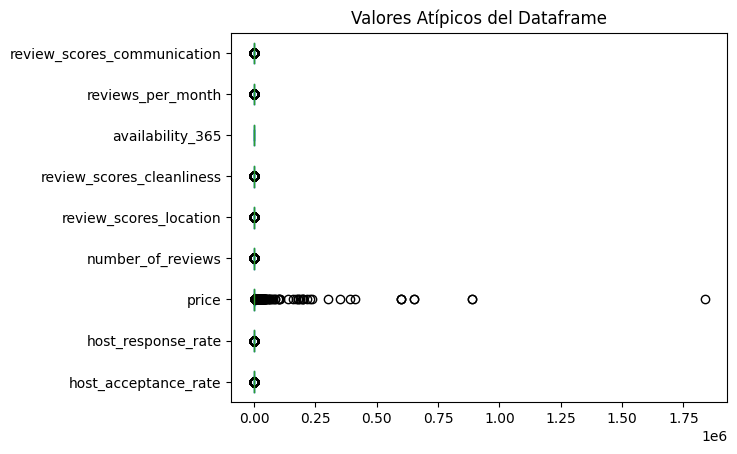

In [171]:
#Realizamos diagrama de caja o bigote de cada columna del nuevo dataframe para poder observar los valores atipicos de cada dato numerico
fig = plt.figure(figsize =(15, 8))
data4.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [172]:
#Seleccionamos solo las columnas númericas del df
datos_num = data4.select_dtypes(include=['number'])

#Definimos los limites con desviación estándar
y=datos_num
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()

#Eliminamos los outliers
y= y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
y.isnull().sum()

host_acceptance_rate           930
host_response_rate             803
price                           36
number_of_reviews              564
review_scores_location         376
review_scores_cleanliness      482
availability_365                 0
reviews_per_month              282
review_scores_communication    430
dtype: int64

In [173]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
data5 = data4.fillna(round(data4.mean(),1))
# Verificamos que no haya mas nulos
data5.isnull().sum()

<ipython-input-173-7778c79bb644>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data4.fillna(round(data4.mean(),1))


host_acceptance_rate           0
host_response_rate             0
price                          0
number_of_reviews              0
review_scores_location         0
review_scores_cleanliness      0
availability_365               0
reviews_per_month              0
review_scores_communication    0
room_type                      0
property_type                  0
dtype: int64

In [174]:
data5.describe()

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
count,24224.000000,24224.000000,2.422400e+04,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000
mean,0.913612,0.945030,1.902680e+03,36.585205,4.830733,4.745231,245.593791,1.708333,4.816027
std,0.209549,0.183069,1.819702e+04,63.175200,0.393203,0.463461,123.902902,1.918791,0.433970
min,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.010000,1.000000
25%,0.950000,1.000000,5.590000e+02,2.000000,4.820000,4.700000,144.000000,0.460000,4.810000
50%,1.000000,1.000000,9.600000e+02,12.000000,4.940000,4.880000,304.000000,1.120000,4.940000
75%,1.000000,1.000000,1.600000e+03,43.000000,5.000000,5.000000,356.000000,2.370000,5.000000
max,1.000000,1.000000,1.838000e+06,1092.000000,5.000000,5.000000,365.000000,48.000000,5.000000


In [175]:
data5.to_csv("Paso3.csv")

In [176]:
from google.colab import files

files.download("Paso3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Correlacion

In [177]:
data6 = data5.copy()

In [178]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         24224 non-null  float64
 1   host_response_rate           24224 non-null  float64
 2   price                        24224 non-null  float64
 3   number_of_reviews            24224 non-null  int64  
 4   review_scores_location       24224 non-null  float64
 5   review_scores_cleanliness    24224 non-null  float64
 6   availability_365             24224 non-null  int64  
 7   reviews_per_month            24224 non-null  float64
 8   review_scores_communication  24224 non-null  float64
 9   room_type                    24224 non-null  object 
 10  property_type                24224 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.0+ MB


In [180]:
data6['room_type'].value_counts()

Entire home/apt    15602
Private room        8202
Shared room          293
Hotel room           127
Name: room_type, dtype: int64

##Comparacion 1 : “host_acceptance_rate vs host_response_rate”

In [181]:
from turtle import color
t1 = data6[(data6["room_type"] == "Entire home/apt")]
t2 = data6[(data6["room_type"] == "Private room")]

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

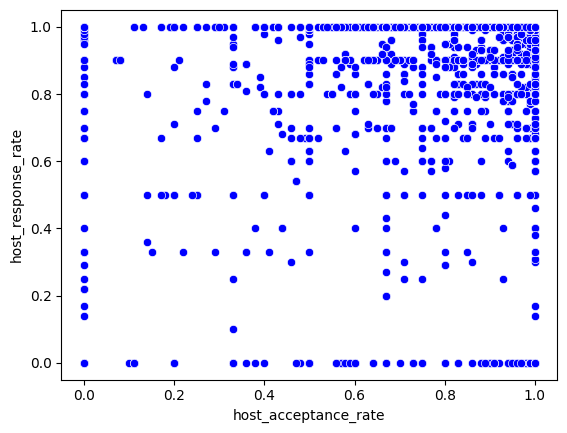

In [182]:
#Entire home/apt
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color='blue', data=t1)

In [183]:
#Entire home/apt
correlacion = t1['host_acceptance_rate'].corr(t1['host_response_rate'])
correlacion

0.34566949464094854

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

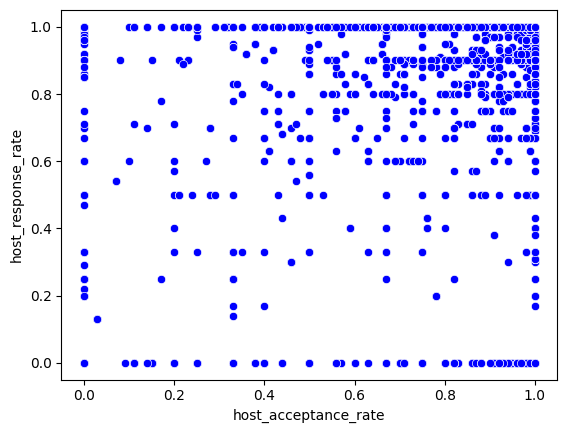

In [184]:
#Private room
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color='blue', data=t2)

In [185]:
#Private room
correlacion = t2['host_acceptance_rate'].corr(t2['host_response_rate'])
correlacion

0.3541520531956119

##Comparacion 2 : review_scores_location vs review_scores_cleanliness

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

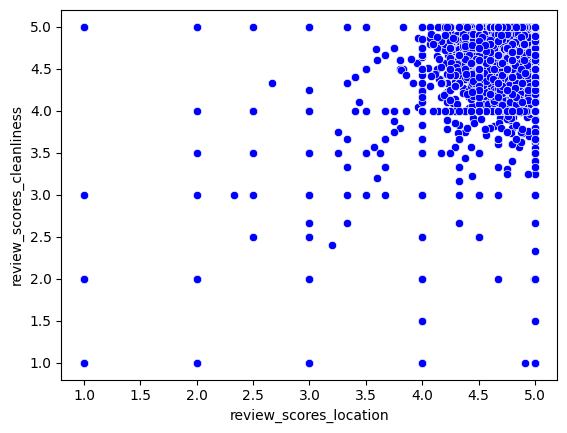

In [186]:
#Entire home/apt
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color='blue', data=t1)

In [187]:
#Entire home/apt
correlacion = t1['review_scores_location'].corr(t1['review_scores_cleanliness'])
correlacion

0.5761444046781378

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

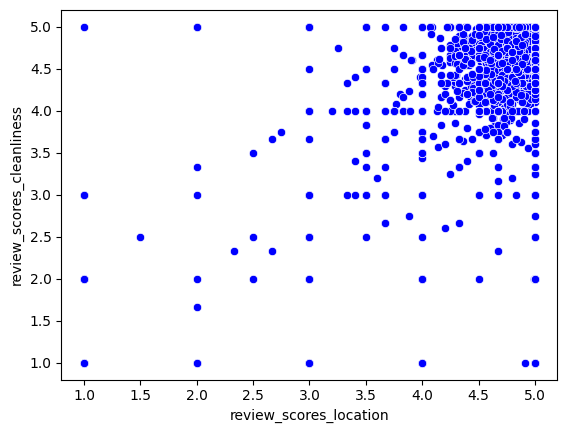

In [188]:
#Private room
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color='blue', data=t2)

In [189]:
#Private room
correlacion = t2['review_scores_location'].corr(t2['review_scores_cleanliness'])
correlacion

0.7331111708425719

##Comparacion 3 : host_acceptance_rate vs price

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

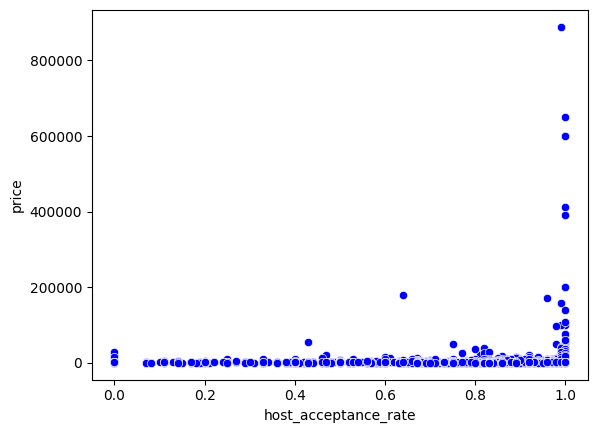

In [190]:
#Entire home/apt
sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=t1)

In [191]:
#Entire home/apt
correlacion = t1['host_acceptance_rate'].corr(t1['host_response_rate'])
correlacion

0.34566949464094854

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

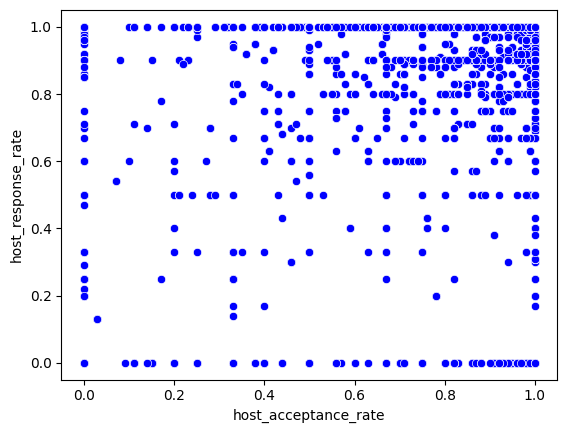

In [192]:
#Private room
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color='blue', data=t2)

In [193]:
#Private room
correlacion = t2['host_acceptance_rate'].corr(t2['host_response_rate'])
correlacion

0.3541520531956119

##Comparacion 4: review_scores_location vs review_scores_cleanliness

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

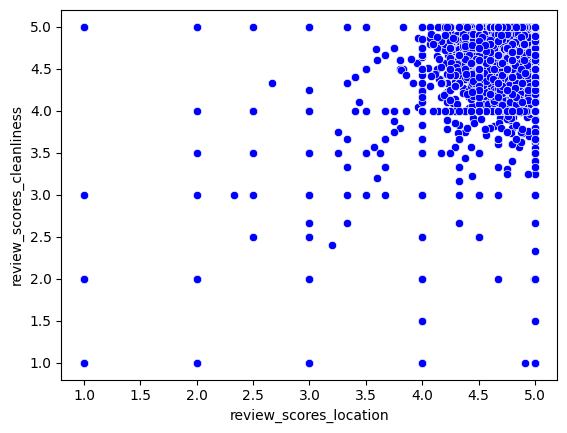

In [194]:
#Entire home/apt
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color='blue', data=t1)

In [195]:
#Entire home/apt
correlacion = t1['review_scores_location'].corr(t1['review_scores_cleanliness'])
correlacion

0.5761444046781378

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

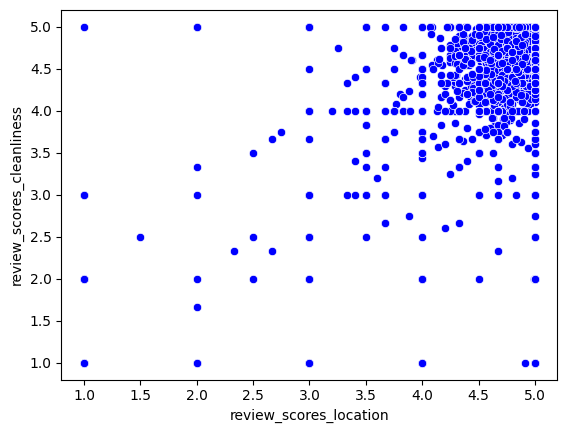

In [196]:
#Private room
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color='blue', data=t2)

In [197]:
#Private room
correlation = t2['review_scores_location'].corr(t2['review_scores_cleanliness'])
correlation

0.7331111708425719

##Comparacion 5: host_acceptance_rate vs price

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

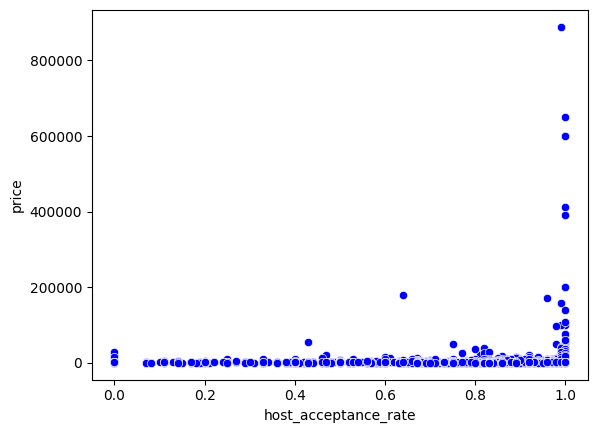

In [198]:
#Entire home/apt
sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=t1)

In [199]:
#Entire home/apt
correlacion = t1['host_acceptance_rate'].corr(t1['price'])
correlacion

0.004733836755141789

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

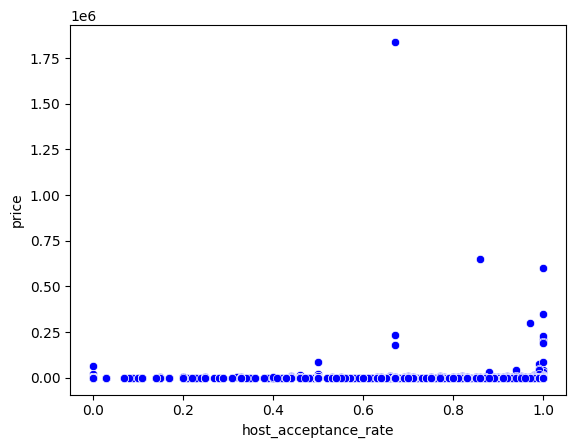

In [200]:
#Private room
sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=t2)

In [201]:
#Private room
correlacion = t2['host_acceptance_rate'].corr(t2['price'])
correlacion

-0.0037737646495965317

##Comparacion 6: availability_365 vs number_of_reviews

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

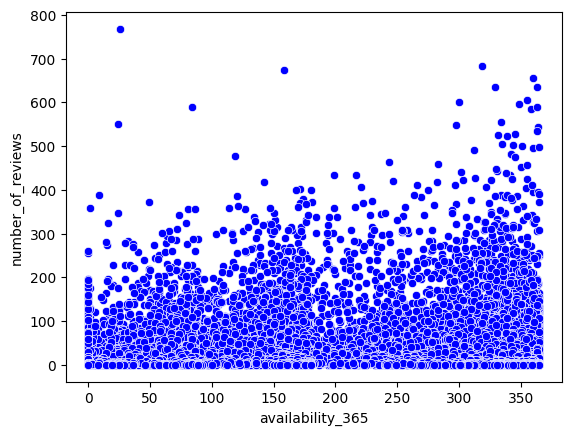

In [202]:
#Entire home/apt
sns.scatterplot(x='availability_365', y='number_of_reviews', color='blue', data=t1)

In [203]:
#Entire home/apt
correlacion = t1['availability_365'].corr(t1['number_of_reviews'])
correlacion

-0.03175807465595249

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

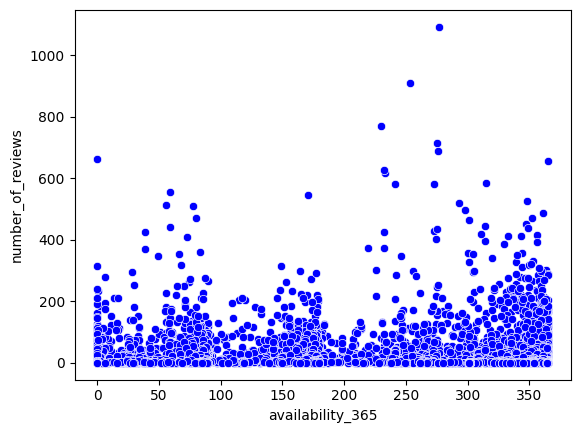

In [204]:
#Private room
sns.scatterplot(x='availability_365', y='number_of_reviews', color='blue', data=t2)

In [205]:
#Private room
correlation = t2['availability_365'].corr(t2['number_of_reviews'])
correlation

-0.042996977734164894

##Comparacion 7: host_acceptance_rate vs number_of_reviews

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

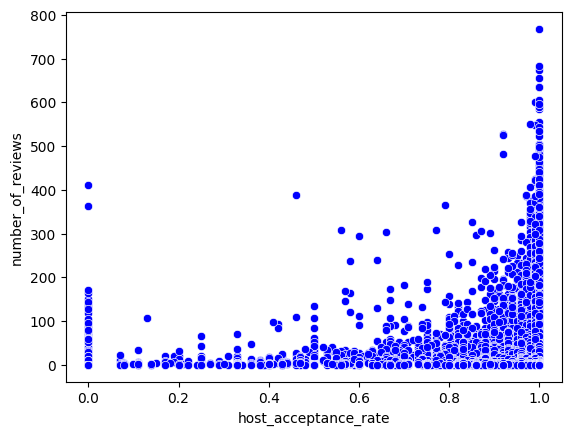

In [206]:
#Entire home/apt
sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color='blue', data=t1)

In [207]:
#Entire home/apt
correlacion = t1['host_acceptance_rate'].corr(t1['number_of_reviews'])
correlacion

0.12567049549554404

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

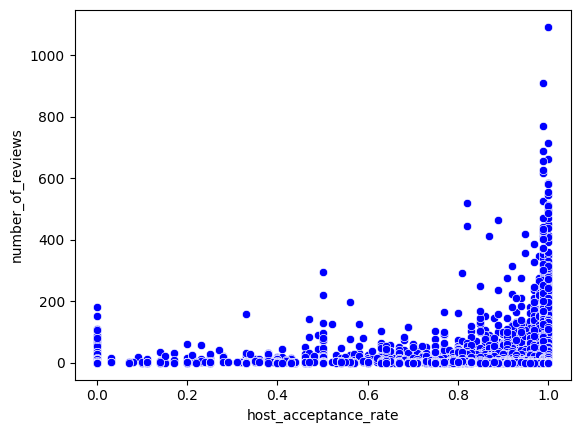

In [208]:
#Private room
sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color='blue', data=t2)

In [209]:
#Private room
correlacion = t2['host_acceptance_rate'].corr(t2['number_of_reviews'])
correlacion

0.1274686680518933

##Comparacion 8: reviews_per_month vs review_scores_communication

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

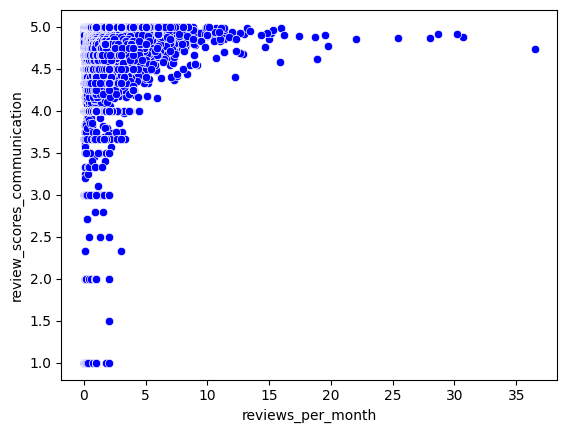

In [210]:
#Entire home/apt
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color='blue', data=t1)

In [211]:
#Entire home/apt
correlacion = t1['reviews_per_month'].corr(t1['review_scores_communication'])
correlacion

0.0675963093894563

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

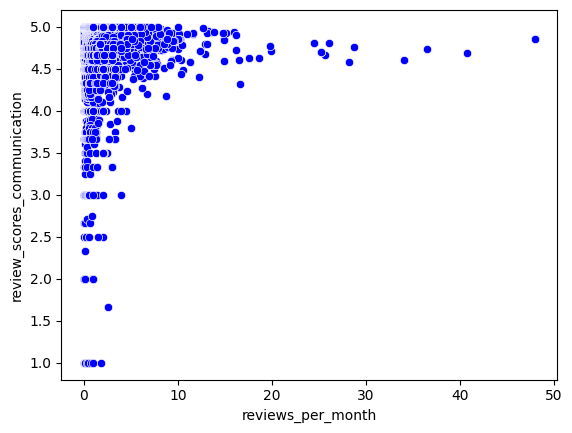

In [212]:
#Private room
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color='blue', data=t2)

In [213]:
#Private room
correlation = t2['reviews_per_month'].corr(t2['review_scores_communication'])
correlation

0.04491837438714758

In [214]:
data6.to_csv("Paso4.csv")

In [215]:
from google.colab import files

files.download("Paso4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Modelo matematico

In [216]:
data7 = data6.copy()

In [218]:
#Creamos la matriz de correlación de nuestro dataframe 7
variables=abs(data.corr(numeric_only=True))
#Seleccionamos solo la columna de 'number-of_reviews' y buscamos con que variable tiene la correlacion mas alta
variables['number_of_reviews'].nlargest()

number_of_reviews         1.000000
number_of_reviews_ltm     0.731198
reviews_per_month         0.590752
number_of_reviews_l30d    0.445345
id                        0.330819
Name: number_of_reviews, dtype: float64

In [219]:
from sklearn.linear_model import LinearRegression
# Creamos una lista para almacenar nuestros resultados
modelo_2 = []

# creamos una lista para los tipos de alojamiento que estan en nuestro dataframe
alojamientos = data7['property_type'].unique()

for tipo in alojamientos:
    # Necesitamos seleccionar los datos en donde solo este la condicion de tipo de alojamiento
    tipo_aloja = data7[data7['property_type'] == tipo]

    # Definimos las variables dependientes e independientes
    var_indep = tipo_aloja['price'].values.reshape(-1, 1)
    var_dep = tipo_aloja['number_of_reviews']

    # Generamos el modelo
    model = LinearRegression()
    model.fit(X=var_indep, y=var_dep)

    modelo_2.append(model.score(X=var_indep, y=var_dep))

res = pd.DataFrame({'Tipo de Alojamiento': alojamientos, 'Coeficiente de determinación': modelo_2, 'Coeficiente de correlación': np.sqrt(modelo_2)})

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

##tabla de todos los coeficientes de determinación y correlación obtenidos

In [221]:
#Desplegamos los resultados
print(res.to_string())
#Los datos nulos nos indican que no hay suficientes datos para poder crear un modelo de regresion lineal

                   Tipo de Alojamiento  Coeficiente de determinación  Coeficiente de correlación
0                          Entire loft                      0.000136                    0.011655
1                   Entire guest suite                      0.000215                    0.014648
2                   Entire rental unit                      0.000059                    0.007687
3                         Entire villa                      0.068460                    0.261648
4                          Entire home                      0.006891                    0.083011
5                         Entire condo                      0.000435                    0.020858
6                 Private room in home                      0.001690                    0.041106
7           Room in serviced apartment                      0.020554                    0.143366
8            Entire serviced apartment                      0.000639                    0.025279
9          Private room in ren

In [222]:
data7.to_csv("Paso5.csv")

In [223]:
from google.colab import files

files.download("Paso5.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>